# Lab 5 - Solutions 1: Linearly separable data

Hopefully it is now clear to you that instantiating a Perceptron in Python is
a matter of just a few lines provided that you are happy to just accept all default values and are not too interested in optimisation and what's happening under the hood.

A take-away point from this lab is that if you know that your problem is linearly separable then you can set a stopping criterion based on reaching zero misclassification error. If the problem is not linearly separable then you need to look at an alternative. The default is to look at whether accuracy is improving (although you have to be wary of overfitting - not so much a problem for these simple data, but care is needed when you start fitting more complex models, like multi-layer perceptrons). In Lab 5, Solutions 2, I provide an alternative solution based on the norm of the change in weight (see notebook Lab 5 Solutions 2).

In [1]:
import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt

Generate the data

In [2]:
nbpts1 = 100  # Number of points in first cluster (vary to explore effect of number of points)
mu1 = [2, 0]  # the mean of the first cluster (this is a vector as we are in 2D) -- move it around
sigma1 = [[1, 0], [0, 1]]  # the covariance matrix of the first cluster -- this one is not correlated
input1 = np.random.multivariate_normal(mu1, sigma1, nbpts1)

nbpts2 = 100  # Number of points in second cluster (vary to explore effect of number of points)
mu2 = [10, 0]  # the mean of the second cluster (this is a vector as we are in 2D) -- move it around
sigma2 = [[1, 0], [0, 1]]  # the covariance matrix of the second cluster
input2 = np.random.multivariate_normal(mu2, sigma2, nbpts2)

data = np.concatenate((input1, input2), axis=0)  # Concatenate the data by row
classes = np.concatenate([np.zeros(nbpts1, dtype=int), np.ones(nbpts2, dtype=int)])  # integers

2D plot of the data to check linear separability

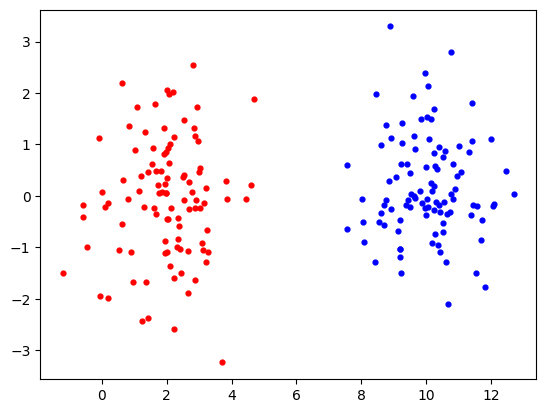

In [3]:
plt.figure(1)
plt.scatter(input1[:, 0], input1[:, 1], c='r', s=12)
plt.scatter(input2[:, 0], input2[:, 1], c='b', s=12)

should be linearly separable! If not, try again until it works or move means further apart.

# Batch learning, default settings.

In [4]:
## Set up Perceptron for batch
from sklearn.linear_model import Perceptron
from sklearn.metrics import accuracy_score, hinge_loss, confusion_matrix  # Python has a class of metrics -- very useful

In [5]:
clf = Perceptron()  # Default without option: This will return a warning on max_iter and tol -- adjust to your liking
# You should check what the defaults are. For example, alpha=0.0001 but alpha is regularisation which is not something we discussed in the context of Perceptron. The learning rate eta0 = 1.
clf.fit(data, classes)  # Learning.

Perceptron()

In [6]:
pred_class = clf.predict(data)  # Prediction after learning

Print some statistics

In [7]:
print(f'Process completed in {clf.n_iter_} epochs')
print(f'Classification accuracy = {accuracy_score(classes, pred_class, normalize=False)}')
print(confusion_matrix(classes, pred_class))  # Confusion matrix

Process completed in 8 epochs
Classification accuracy = 200
[[100   0]
 [  0 100]]


In [8]:
# Let's plot the weights
print(f'Final weights are: {clf.coef_[0][0]:.3f} {clf.coef_[0][1]:.3f} {clf.intercept_[0]:.3f}\n')

Final weights are: 3.430 -0.349 -16.000



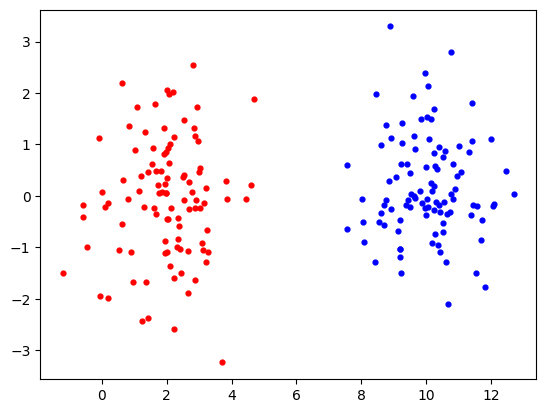

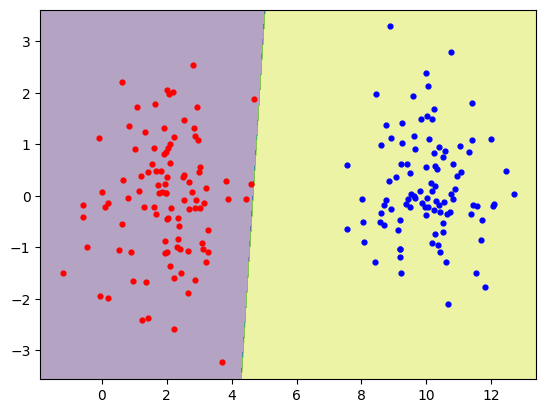

In [9]:
# Plotting decision regions

# First find out area of the graph
plt.figure(1)
plt.scatter(input1[:, 0], input1[:, 1], c='r', s=12)
plt.scatter(input2[:, 0], input2[:, 1], c='b', s=12)
axes = plt.gca()
(x_min, x_max) = axes.get_xlim()
(y_min, y_max) = axes.get_ylim()
# Generate a meshgrid over which to make predictions
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))
plt.figure(2)
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, alpha=0.4)  # Will reveal decision boundary
plt.scatter(input1[:, 0], input1[:, 1], c='r', s=12)
plt.scatter(input2[:, 0], input2[:, 1], c='b', s=12)

# Sequential learning, default settings.

Completed after 349 iterations or 2 epochs
Classification accuracy = 200
[[100   0]
 [  0 100]]
Final weights are: 0.328 -0.143 -2.000


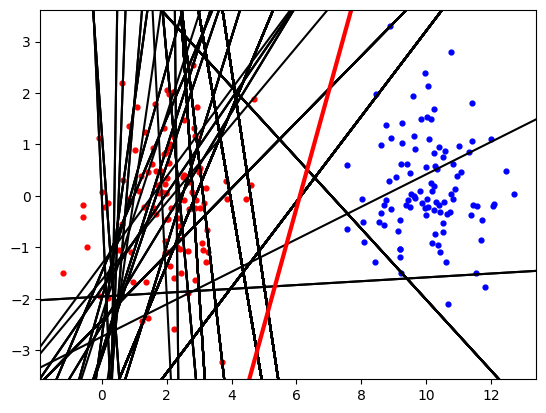

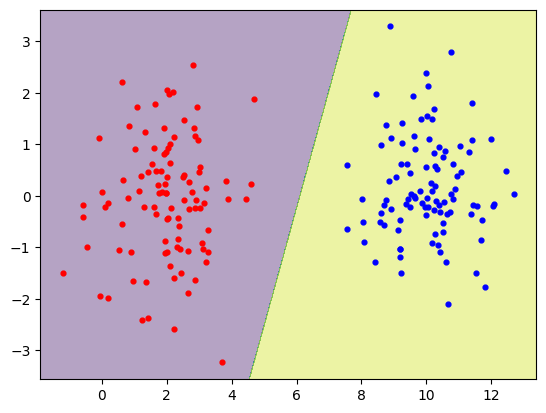

In [10]:
## Set up Perceptron for sequential
# Same code but use function partial_fit.
from sklearn.utils import shuffle  # will use this function to shuffle presentation of data before each epoch

clf = Perceptron(eta0=0.1, alpha=0.0)  # Here I'm going to specify a value for the learning rate (consider changing it to see effect) and also setting regularisation to 0.0 as we do not need it.

# Shuffle dataset
data, classes = shuffle(data, classes, random_state=0)

plt.figure(3)
plt.scatter(input1[:, 0], input1[:, 1], c='r', s=12)
plt.scatter(input2[:, 0], input2[:, 1], c='b', s=12)

num_iter = 0
while True:
    clf.partial_fit(data[num_iter % len(data), :].reshape(1, -1), [classes[num_iter % len(data)]], classes=np.unique(classes))
    # Learning over one sample

    # Plot the new decision boundary
    axes = plt.gca()
    (x_min, x_max) = axes.get_xlim()
    (y_min, y_max) = axes.get_ylim()  # We want to keep the plot to the same dimension
    plt.plot([x_min, x_max],
             [(-clf.coef_[0][0] * x_min-clf.intercept_) / clf.coef_[0][1],
              (-clf.coef_[0][0] * x_max-clf.intercept_) / clf.coef_[0][1]],
             'k-')
    plt.ylim([y_min, y_max])  # Restrict plot to original dimension
    plt.xlim([x_min, x_max])

    pred_class = clf.predict(data)  # Prediction after learning
    num_iter += 1

    # Check termination criterion
    if accuracy_score(classes, pred_class, normalize=False) == len(data):  # We are done!
        break

    # Shuffle at the end of each epoch
    if num_iter % len(data) == 0:
        data, classes = shuffle(data, classes, random_state=0)  # Shuffle dataset


# Highlight last boundary
# Plot the new decision boundary
axes = plt.gca()
(x_min, x_max) = axes.get_xlim()
(y_min, y_max) = axes.get_ylim()  # We want to keep the plot to the same dimension
plt.plot([x_min, x_max],
         [(-clf.coef_[0][0] * x_min-clf.intercept_) / clf.coef_[0][1],
          (-clf.coef_[0][0] * x_max-clf.intercept_) / clf.coef_[0][1]],
         'r-', linewidth=3)
plt.ylim([y_min, y_max])  # Restrict plot to original dimension
plt.xlim([x_min, x_max])


# Print some statistics
print(f'Completed after {num_iter} iterations or {int(np.ceil(num_iter / len(data)))} epochs')
print(f'Classification accuracy = {accuracy_score(classes, pred_class, normalize=False)}')
print(confusion_matrix(classes, pred_class))  # Confusion matrix

# Let's plot the weights
print(f'Final weights are: {clf.coef_[0][0]:.3f} {clf.coef_[0][1]:.3f} {clf.intercept_[0]:.3f}')


# Plotting decision regions
# First find out area of the graph
axes = plt.gca()
(x_min, x_max) = axes.get_xlim()
(y_min, y_max) = axes.get_ylim()
# Generate a meshgrid over which to make predictions
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))
plt.figure(4)
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, alpha=0.4)  # Will reveal decision boundary
plt.scatter(input1[:, 0], input1[:, 1], c='r', s=12)
plt.scatter(input2[:, 0], input2[:, 1], c='b', s=12)

Why is the decision boundary hanging out for much longer amongst the red class? Smaller x values lead to smaller weight changes according to the weight update rule. This is why one should normalise the data to be centred around 0. We will talk about this in week 7.